In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#bibliotecas para download de imagens
import zipfile
import urllib.request as url

In [2]:
#baixando imagens
url.urlretrieve('https://github.com/Alyssonmach/pdi-labs/raw/main/imagens.zip', 'imagens.zip')
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

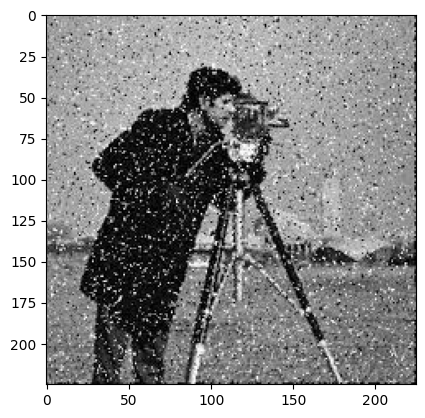

In [4]:
#definindo a imagem como escala de cinza
image = cv.imread("imagem1.jpg")
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = "gray")

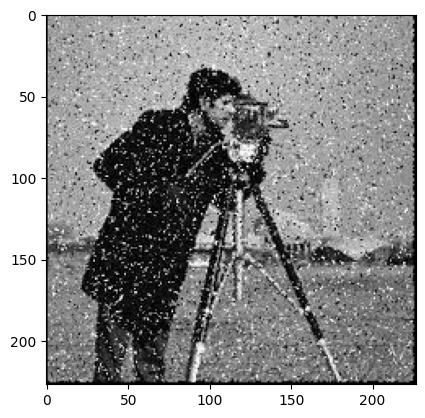

In [10]:
#definindo tamanho da imagem
a, b = img_gray.shape

#copiando imagem, porém com bordas em preto
y1 = np.zeros((a+2, b+2), dtype = int)
y1[1:a+1, 1:b+1] = img_gray[0:a, 0:b]
a1, b1 = y1.shape

#plotando imagem com bordas ajustadas
plt.imshow(y1, cmap = "gray")

In [19]:
#definindo função salt and pepper
def salt_and_pepper(mat, a, b):
    mat1 = np.zeros((a,b), dtype = int)
    x = np.zeros((3,3))
    for i in range(1, a-1):
        for j in range(1, b-1):
            x = np.array([[mat[i-1,j-1],mat[i-1,j],mat[i-1,j+1]],
                  [mat[i,j-1],mat[i,j],mat[i,j+1]],
                  [mat[i+1,j-1],mat[i+1,j],mat[i+1,j+1]]])
            median = np.median(x)
            mat1[i,j] = median
    return mat1

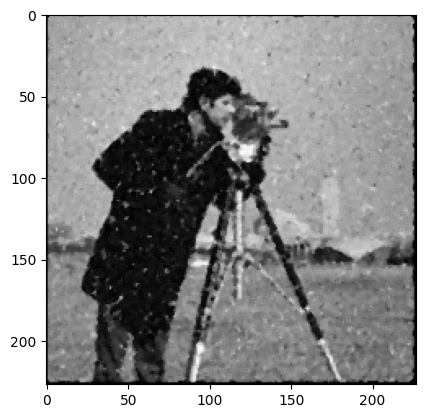

In [21]:
#obtendo a imagem com o filtro aplicado e plotando-a
y2 = salt_and_pepper(y1, a1, b1)
plt.imshow(y2, cmap = "gray")